# Lesson 07
# Houda Aynaou

## Workplace Scenario
Kennedy's oceanographic institute client pulled into port the other day with a ton (literally) of collected samples and corresponding data to process. Some of these data tasks are being distributed to others to work on; you've got the abalone (marine snails) data to classify and determine the age from physical characteristics. 

### Background
Age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Other measurements, which are easier to obtain, could be used to predict the age. According to the data provider, original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled (by dividing by 200) for use with machine learning algorithms such as SVMs.

The target field is “Rings”. Since the output is continuous the solution can be handled by a Support Vector Regression or it can be changed to a binary Support Vector Classification by assigning examples that are younger than 11 years old to class: ‘0’ and those that are older (class: ‘1’).

See [UCI's Abalone Data](https://archive.ics.uci.edu/ml/datasets/abalone) set for more information.

## To Do:

Create a new notebook to build an experiment using support vector machine classifier and regression. Perform each of the following tasks and answer the questions:

1. Convert the continuous output value from continuous to binary (0,1) and build an SVC
2. Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?
3. Test different kernels and hyperparameters or consider using sklearn.model_selection.SearchGridCV. Which kernel performed best with what settings?
4. Show recall, precision and f-measure for the best model
5. Using the original data, with rings as a continuous variable, create an SVR model
6. Report on the predicted variance and the mean squared error

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Data 

In [4]:
LINK = 'https://raw.githubusercontent.com/houdaaynaou/DS-Certificate-UW/master/Course%203%20Machine%20Learning%20Techniques/Data/Abalone.csv'
data = pd.read_csv(LINK)
data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.shape

(4177, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
data.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


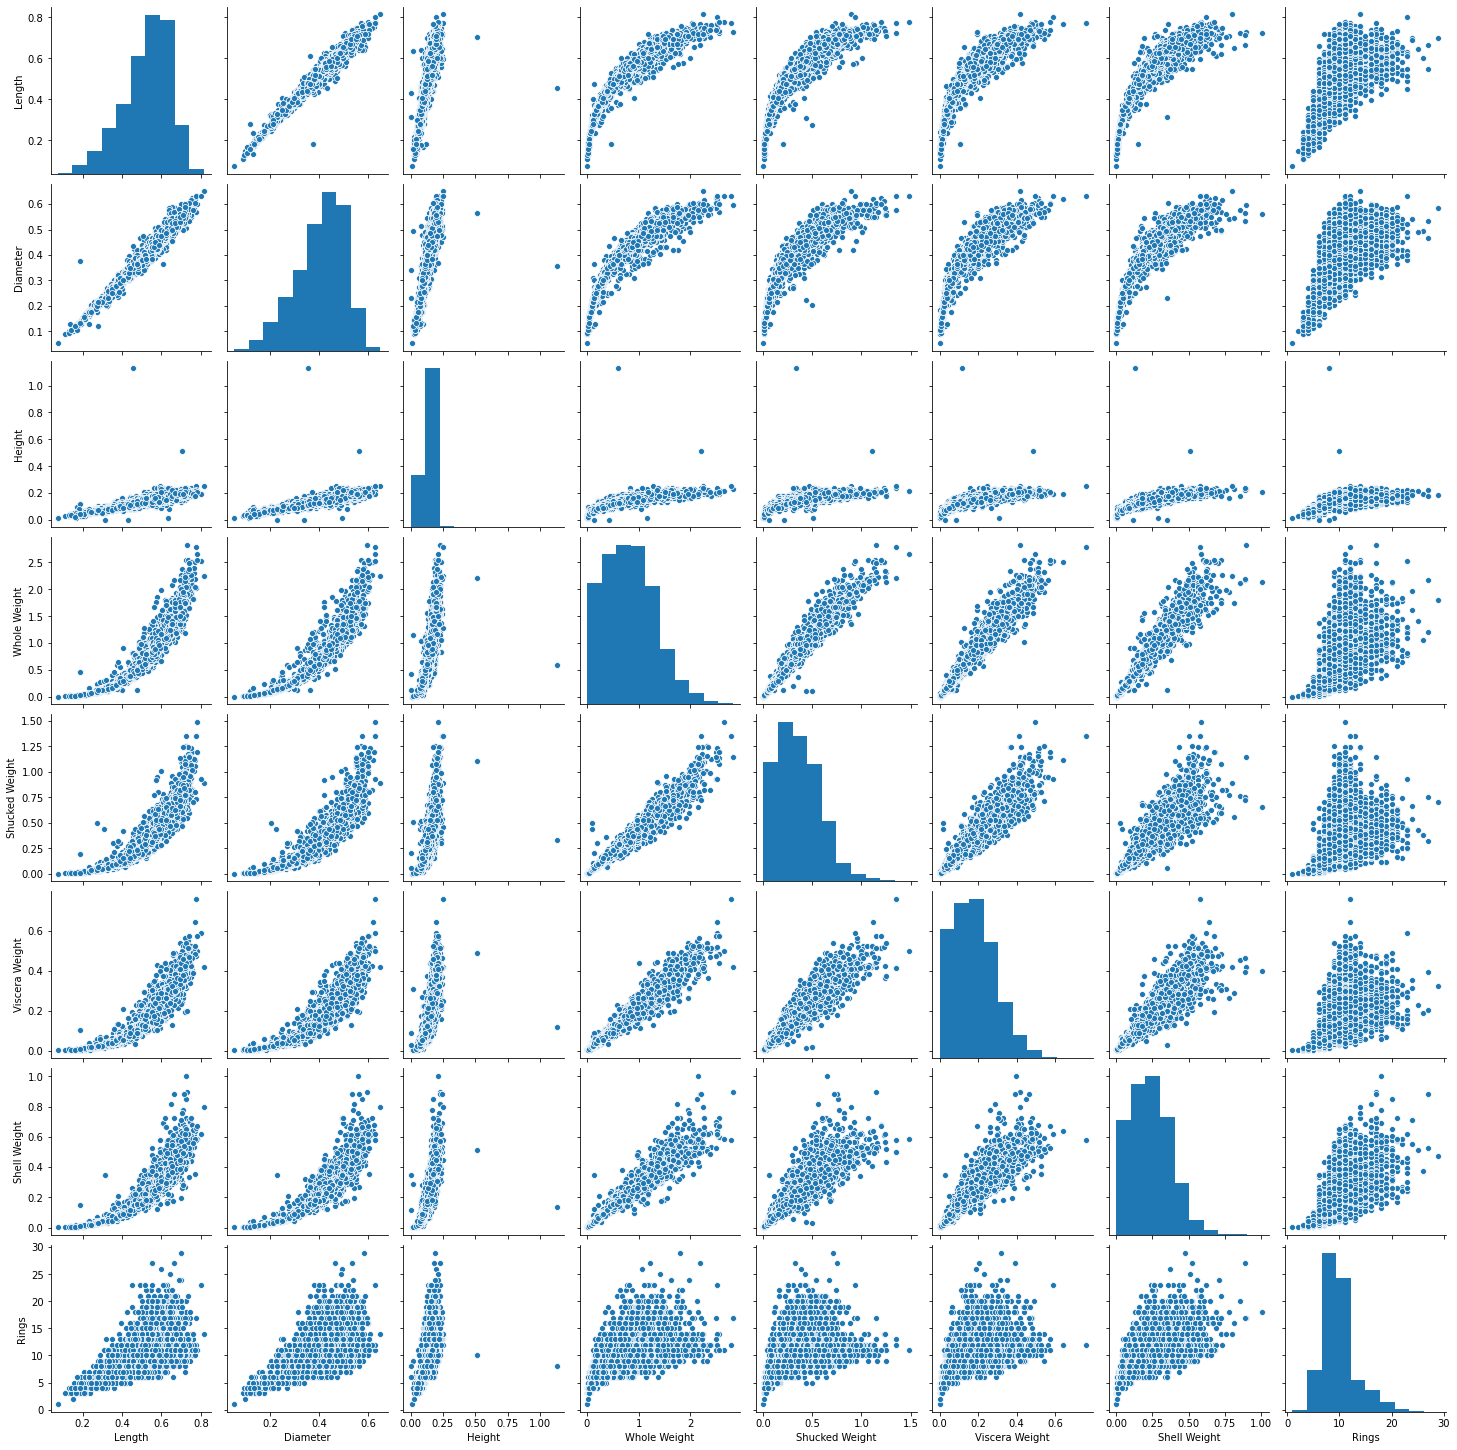

In [10]:
sns.pairplot(data)

## 2. Convert the continuous output value from continuous to binary (0,1) and build an SVC

Create a new column that is a classification target by using the existing continuous target and “assigning examples that are younger than 11 years old to class: ‘0’ and those that are older (class: ‘1’)”.



In [18]:
# Creating new classification Target:
data.loc[data[data['Rings'] > 11 ].index, 'Binary_rings'] = 1
data.loc[data[data['Rings'] < 11 ].index, 'Binary_rings'] = 0
data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Binary_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0


In [23]:
# Split to train and test set

from sklearn.model_selection import train_test_split

features = data.drop(['Rings', 'Binary_rings'], axis= 1)
target = data['Binary_rings']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)


1593    0.0
111     0.0
3271    1.0
1089    0.0
2918    0.0
       ... 
3444    0.0
466     1.0
3092    NaN
3772    0.0
860     0.0
Name: Binary_rings, Length: 2798, dtype: float64

In [22]:
# Building SVM classifier

from sklearn.svm import SVC

svmc = SVC(gamma = 'scale', cache_size = 1024) # cache size can improve performance
svmc.fit(X_train, y_train)

y_hat_train = svmc.predict(X_train)
y_hat_test = svmc.predict(X_test)


ValueError: could not convert string to float: 'F'

## 3. Using your best guess for hyperparameters and kernel, what is the percentage of correctly classified results?


## 4. Test different kernels and hyperparameters or consider using sklearn.model_selection.SearchGridCV. Which kernel performed best with what settings?
For this dataset, GridSearchCV() is pretty quick.

## 5. Recall, precision and f-measure for the best model

## 6. Using the original data, with rings as a continuous variable, create an SVR model
In other words, use a support vector machine for regression (using the continuous target). Here is a short SVR example  (Links to an external site.) - nothing too surprising.

## 7. Report on the predicted variance and the mean squared error
You might find some of the following methods helpful:
sklearn.metrics.mean_squared_error()
sklearn.metrics.explained_variance_score()